In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Importing Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.base import clone
from sklearn.feature_selection import SelectKBest, f_regression

# For feature engineering and model evaluation
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# For seasonal decomposition and plots
from matplotlib import dates as mdates
import matplotlib.ticker as ticker

# Other useful libraries
import warnings
warnings.filterwarnings('ignore')
movie = pd.read_csv('/content/archive (12).zip', encoding='ISO-8859-1')
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [2]:
movie.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [3]:
movie.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [4]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
movie = movie.drop(movie.index[0]).reset_index(drop=True)
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [6]:
movie.isnull().sum().sort_values(ascending=False)/len(movie)

Duration    0.533144
Rating      0.489360
Votes       0.489296
Actor 3     0.202734
Actor 2     0.153727
Genre       0.121034
Actor 1     0.104269
Year        0.033982
Director    0.033853
Name        0.000000
dtype: float64

In [7]:
print("Number of rows:", movie.shape[0])
print("Number of columns:", movie.shape[1])

Number of rows: 15508
Number of columns: 10


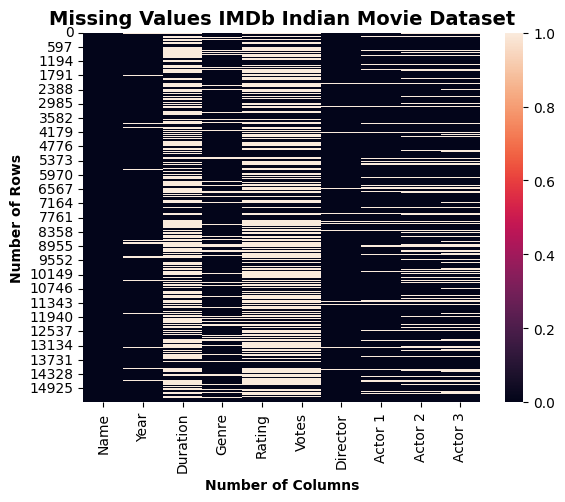

In [8]:
sns.heatmap(movie.isnull())

# Plot Title
plt.title("Missing Values IMDb Indian Movie Dataset",
          fontsize=14,
          fontweight='bold')

# Title for x and y-axis labels with formatting
plt.xlabel("Number of Columns",
           fontweight='bold')
plt.ylabel("Number of Rows",
           fontweight='bold')
plt.show()

In [9]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [10]:
missing_count = movie.isnull().sum().sort_values(ascending=False)
missing_percent = (round(movie.isnull().sum()/movie.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent],
                       axis=1,
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8268,53.31
Rating,7589,48.94
Votes,7588,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,527,3.40
Director,525,3.39
Name,0,0.00


In [11]:
movie.dropna(subset=['Rating'], inplace=True)
(round(movie.isnull().sum()/movie.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [12]:
movie.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(movie.isnull().sum()/movie.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [13]:
movie['Duration'] = movie['Duration'].astype(str)
movie['Duration'] = pd.to_numeric(movie['Duration'].str.replace(' min', ''), errors='coerce')
movie['Duration'].fillna(movie['Duration'].mean(),
                         inplace=True)

movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
movie['Year'] = movie['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in movie['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
movie['Year'] = year_lst
# Check the data type of the 'Votes' column
print(movie['Votes'].dtype)

# If it's not already a string, convert it to string with commas
movie['Votes'] = movie['Votes'].astype(str)

# Replace commas and convert to int
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)

# Check the data type after conversion
print(movie['Votes'].dtype)

object
int64


In [16]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 649.5+ KB


In [17]:
movie['Year'].unique()

array(['2019', '1997', '2005', '2012', '2014', '2004', '2016', '1991',
       '2018', '2010', '1958', '2021', '2017', '2009', '1993', '2002',
       '1946', '2008', '1994', '2007', '2013', '2003', '1998', '1979',
       '1974', '2015', '2006', '1981', '2020', '1985', '2011', '1988',
       '1995', '1987', '1999', '1973', '1968', '1953', '1986', '1982',
       '1977', '1950', '1969', '1948', '1967', '1970', '1990', '1989',
       '1947', '2001', '2000', '1971', '1978', '1944', '1963', '1992',
       '1976', '1984', '1975', '1980', '1966', '1972', '1956', '1960',
       '1964', '1952', '1959', '1951', '1954', '1962', '1961', '1957',
       '1965', '1996', '1933', '1955', '1983', '1936', '1949', '1940',
       '1945', '1938', '1941', '1942', '1932', '1935', '1937', '1931',
       '1943', '1917', '1939', '1934'], dtype=object)

In [18]:
movie[['Rating', 'Duration', 'Votes']].describe()

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
25%,4.900000,125.000000,18.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
max,10.000000,321.000000,591417.000000


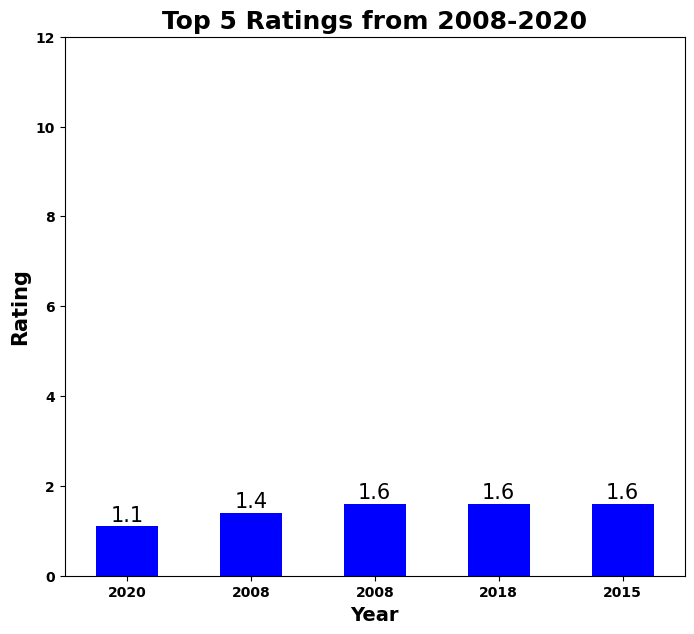

In [19]:
top5_rating = movie[['Year', 'Rating']].sort_values(by = 'Rating',
                                                    ascending = True).head()
bars = top5_rating.plot(kind = 'bar',
                        x = 'Year',
                        y = 'Rating',
                        color = 'blue',
                        legend = None,
                        figsize = (8,7))
plt.xlabel('Year',
           fontsize = 14,
           fontweight = 'bold')
plt.ylabel('Rating',
           fontsize = 15,
           fontweight = 'bold')
plt.title('Top 5 Ratings from 2008-2020',
          fontsize = 18,
          fontweight = 'bold')
plt.xticks(fontweight = 'bold',
           rotation = 0)
plt.yticks(np.arange(0, 13, 2), fontweight='bold')

#Labelling Plot
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 size=15,
                 xytext=(0, 8),
                 textcoords='offset points')

plt.show()

In [20]:
movie.drop('Duration', axis=1, inplace=True)
movie[movie['Votes']>10000]

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
52,2 States,2014,"Comedy, Drama, Romance",6.9,24034,Abhishek Varman,Arjun Kapoor,Alia Bhatt,Amrita Singh
53,2.0,2018,"Action, Sci-Fi",6.2,21938,S. Shankar,Rajinikanth,Akshay Kumar,Amy Jackson
74,3 Idiots,2009,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
172,A Wednesday,2008,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
375,Aamir,2008,"Action, Crime, Drama",7.7,10862,Raj Kumar Gupta,Rajeev Khandelwal,Aishwarya,Vasan Bala
...,...,...,...,...,...,...,...,...,...
15053,When Love Calls,1989,"Drama, Musical, Romance",7.3,11486,Sooraj R. Barjatya,Salman Khan,Bhagyashree,Alok Nath
15246,Yeh Jawaani Hai Deewani,2013,"Drama, Musical, Romance",7.1,39863,Ayan Mukherjee,Ranbir Kapoor,Deepika Padukone,Aditya Roy Kapoor
15299,Yes Boss,1997,"Comedy, Drama, Musical",6.8,12714,Aziz Mirza,Shah Rukh Khan,Juhi Chawla,Aditya Pancholi
15425,Zero,2018,"Comedy, Drama, Romance",5.4,24784,Aanand L. Rai,Shah Rukh Khan,Anushka Sharma,Katrina Kaif
